In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting style
sns.set(style='whitegrid')

In [2]:
# Load manually downloaded dataset
df = pd.read_csv('../data/raw/hospital_readmission_ca.csv')

# Show column names to understand structure
df.columns.tolist()

['Year',
 'Strata',
 'Strata Name',
 'County',
 'Total Admits (ICD-9)',
 '30-day Readmits (ICD-9) ',
 '30-day Readmission Rate (ICD-9)',
 'Total Admits (ICD-10)',
 '30-day Readmits (ICD-10) ',
 '30-day Readmission Rate (ICD-10)']

In [3]:
# Keep relevant columns and rename
df = df[['Year', 'Strata', 'Strata Name', 'County', '30-day Readmission Rate (ICD-9)']]
df = df.rename(columns={
    'Strata': 'Strata',
    'Strata Name': 'Group',
    'County': 'Region',
    '30-day Readmission Rate (ICD-9)': 'Readmission Rate (%)'
})

# Drop missing values
df = df.dropna(subset=['Readmission Rate (%)'])

# Convert percentages to float
df['Readmission Rate (%)'] = df['Readmission Rate (%)'].astype(str).str.replace('%', '').astype(float)

# Preview cleaned data
df.head()

,Year,Strata,Group,Region,Readmission Rate (%)
0,2011,Overall,Overall,State,14.0
1,2011,Age,18 to 44 years,State,11.3
2,2011,Age,45 to 64 years,State,13.8
3,2011,Age,65 years and above,State,15.0
4,2011,Sex,Male,State,14.7


In [4]:
region_avg = df.groupby('Region')['Readmission Rate (%)'].mean().sort_values(ascending=False)
region_avg.head(10)

Region
Butte             16.370
Los Angeles       15.084
Yuba              14.674
Lake              14.612
San Francisco     14.556
Alameda           14.488
San Bernardino    14.054
Imperial          13.940
Fresno            13.838
Trinity           13.820
Name: Readmission Rate (%), dtype: float64

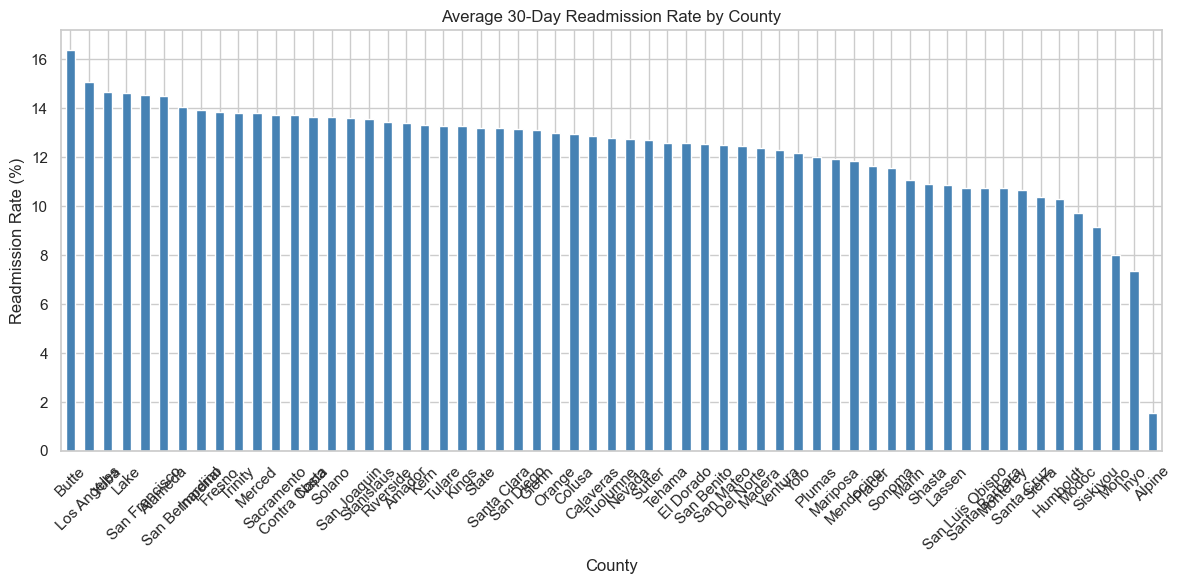

In [5]:
plt.figure(figsize=(12, 6))
region_avg.plot(kind='bar', color='steelblue')
plt.title("Average 30-Day Readmission Rate by County")
plt.xlabel("County")
plt.ylabel("Readmission Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
group_avg = df.groupby('Group')['Readmission Rate (%)'].mean().sort_values(ascending=False)
group_avg.head(10)

Group
African-American          17.670
Medi-Cal                  16.692
MediCare                  15.288
Male                      14.404
65 years and above        14.394
Hispanic                  13.758
45 to 64 years            13.702
Native American           13.686
Asian/Pacific Islander    13.426
White                     13.094
Name: Readmission Rate (%), dtype: float64

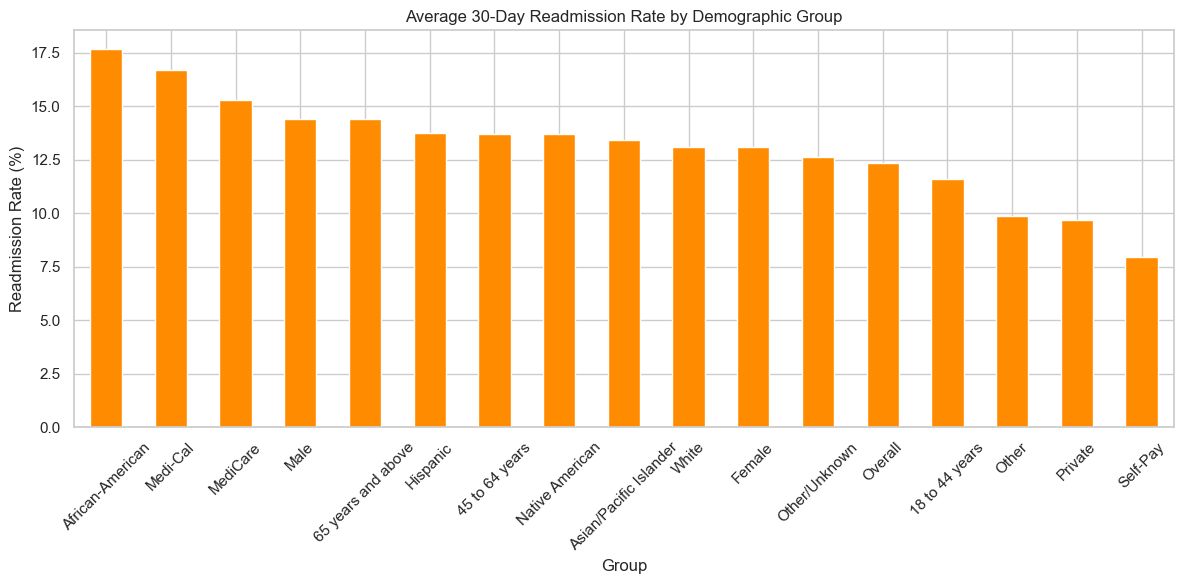

In [7]:
plt.figure(figsize=(12, 6))
group_avg.plot(kind='bar', color='darkorange')
plt.title("Average 30-Day Readmission Rate by Demographic Group")
plt.xlabel("Group")
plt.ylabel("Readmission Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Pivot data for heatmap: Average readmission rate by Group and Year
heatmap_data = df.pivot_table(
    index='Group',
    columns='Year',
    values='Readmission Rate (%)',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Average 30-Day Readmission Rate by Group and Year")
plt.ylabel("Group")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [ ]:
# Aggregate total readmission rate for each Group within each Region
stacked_data = df.groupby(['Region', 'Group'])['Readmission Rate (%)'].mean().unstack().fillna(0)

# Plot stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title("Stacked Bar Chart of Readmission Rate by Region and Group")
plt.xlabel("Region")
plt.ylabel("Readmission Rate (%)")
plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()